This tutorial introduces **ConvoKit**: a conversational analysis toolkit that offers:
1. A *unified representation* for conversational data
2. A *language* for describing *manipulations* of such data

In this notebook, we cover the key ideas behind ConvoKit, as well as some of its most commonly used methods and functions. Read our [documentation](https://convokit.cornell.edu/documentation/) for an exhaustive coverage of ConvoKit's classes and functions.

In [ ]:
try:
    import convokit
except ModuleNotFoundError:
    !pip install convokit

In [2]:
# for pretty printing of cells within the Colab version of this notebook
from IPython.display import HTML, display

def set_css(*args, **kwargs):
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;
        }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import convokit
from convokit import Corpus, download

### Loading a Corpus

A Corpus represents a conversational dataset. We typically begin our analysis by loading a Corpus. A list of existing datasets already in ConvoKit format can be found [here](https://convokit.cornell.edu/documentation/datasets.html).

A growing list of many other conversational datasets covering a variety of conversational settings are available in ConvoKit, such as face-to-face (e.g. the [*Intelligence Squared Debates corpus*](https://convokit.cornell.edu/documentation/iq2.html)), institutional (e.g. the [*Supreme Court Oral Arguments corpus*](https://convokit.cornell.edu/documentation/supreme.html)), fictional (e.g. the [*Cornell Movie Dialog Corpus*](https://convokit.cornell.edu/documentation/movie.html)), or online  (e.g. all talkpage conversations on [*Wikipedia Talk Pages*](https://convokit.cornell.edu/documentation/wiki.html) and a full dump of [*Reddit*](https://convokit.cornell.edu/documentation/subreddit.html)).

For this tutorial, we will primarily be using the *r/Cornell* subreddit corpus to demo various ConvoKit functionality, and occasionally the [*Switchboard Dialog Act Corpus*](https://convokit.cornell.edu/documentation/switchboard.html) (a collection of anonymized five-minute telephone conversations) as a contrasting dataset.

In [4]:
corpus = Corpus(download('subreddit-Cornell'))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem


In [5]:
switchboard_corpus = Corpus(download('switchboard-corpus'))

### Corpus components: Conversations, Utterances, Speakers

Every Corpus has three main components: [Conversations](https://convokit.cornell.edu/documentation/conversation.html), [Utterances](https://convokit.cornell.edu/documentation/utterance.html), and [Speakers](https://convokit.cornell.edu/documentation/speaker.html). Just as in real life, in ConvoKit, Conversations are some sequence of Utterances, where each Utterance is made by some Speaker.

In [6]:
corpus.print_summary_stats()

Number of Speakers: 7568
Number of Utterances: 74467
Number of Conversations: 10744


Each component has a consistent data format, consisting of a set of *primary data fields* and *metadata attributes*.

**Primary data fields** are for information that is central to every Conversation, Utterance, and Speaker object. This includes IDs for the objects, and for Utterances specifically, there are other fields such as: text, timestamp, reply_to (the ID of the Utterance being responded to).

In [7]:
# Let's see this in a random utterance from the r/Cornell Corpus
utt = corpus.random_utterance()

In [8]:
print(utt)

Utterance(id: '4r96nk', conversation_id: 4r96nk, reply-to: None, speaker: Speaker(id: 'MrJanz32', vectors: [], meta: ConvoKitMeta({})), timestamp: 1467665078, text: "I have already been enrolled in CHEM 2090 on student centre. There is only one lecture time, so I don't have a choice there. However, I've also been automatically enrolled in the lab. Does anyone know if I can change this lab to a different day when the enrolment period begins?", vectors: [], meta: ConvoKitMeta({'score': 4, 'top_level_comment': None, 'retrieved_on': 1472926406, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/4r96nk/preenrolled_in_chem_lab_can_i_change_the_lab_to/', 'author_flair_text': ''}))


In [9]:
# primary data fields
print("ID:", utt.id, "\n")
print("Reply_to:", utt.reply_to, "\n")
print("Timestamp:", utt.timestamp, "\n")
print("Text:", utt.text, "\n")
print("Conversation ID:", utt.conversation_id, "\n")
print("Speaker ID:", utt.speaker.id)

ID: 4r96nk 

Reply_to: None 

Timestamp: 1467665078 

Text: I have already been enrolled in CHEM 2090 on student centre. There is only one lecture time, so I don't have a choice there. However, I've also been automatically enrolled in the lab. Does anyone know if I can change this lab to a different day when the enrolment period begins? 

Conversation ID: 4r96nk 

Speaker ID: MrJanz32


**Metadata attributes** are for additional features/labels/annotations for these component objects that might not generalize across corpora. Every component object (i.e. Speaker, Conversation, Utterance) has its own metadata. These can be accessed through the ``.meta`` field of these objects.

In [10]:
utt.meta

ConvoKitMeta({'score': 4, 'top_level_comment': None, 'retrieved_on': 1472926406, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/4r96nk/preenrolled_in_chem_lab_can_i_change_the_lab_to/', 'author_flair_text': ''})

For example, we see that Reddit Utterances have Reddit-specific metadata, such as comment score (from upvotes / downvotes) and subreddit this Utterance belongs to.

Conversations and Utterances have a similar format:

In [11]:
convo = corpus.random_conversation()
print(convo)
print()
convo.meta

Conversation('id': '1rnz81', 'utterances': ['1rnz81', 'cdp7shg', 'cdp8gzh', 'cdp8p70', 'cdp9dsg', 'cdpcy9t', 'cdpdxe0', 'cdpoizq', 'cdpp1ir', 'cdsd0t2', 'cdzviqt', 'ce01p9d'], 'meta': ConvoKitMeta({'title': 'How good is Sprint on the Ithaca campus?', 'num_comments': 9, 'domain': 'self.Cornell', 'timestamp': 1385669830, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': 'Engineering 2017'}))



ConvoKitMeta({'title': 'How good is Sprint on the Ithaca campus?', 'num_comments': 9, 'domain': 'self.Cornell', 'timestamp': 1385669830, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': 'Engineering 2017'})

In [12]:
# We use Switchboard's speakers as they have more interesting metadata
speaker = switchboard_corpus.random_speaker()
print(speaker)
print()
speaker.meta

Speaker(id: '1229', vectors: [], meta: ConvoKitMeta({'sex': 'FEMALE', 'education': 3, 'birth_year': 1950, 'dialect_area': 'NORTHERN'}))



ConvoKitMeta({'sex': 'FEMALE', 'education': 3, 'birth_year': 1950, 'dialect_area': 'NORTHERN'})

### KEY IDEA: Metadata

Every component object has primary data fields -- fields that are fixed and invariable across all corpora.

**Metadata** is where you *customize* the Corpus to your use case.

When working with your own metadata, you may want to add elements specific to your own dataset. The metadata of each object is a dict-like structure that can be customized according to your needs. As such, you may do things like:

- Store the dependency parse of an Utterance
- Label a component according to your own categories
- List the dialog acts present in a Conversation

The **key idea** is that you should think of metadata as a flexible structure for adding any type of additional information that you may need to work with these objects.

In [13]:
# Here's an example of a corpus with more sophisticated labels such as speaker intentions and perceptions
deception_corpus = Corpus(download('diplomacy-corpus'))
deception_corpus.random_utterance().meta

ConvoKitMeta({'speaker_intention': 'Truth', 'receiver_perception': 'Lie', 'receiver': 'italy-Game7', 'absolute_message_index': 724, 'relative_message_index': 32, 'year': '1903', 'game_score': '7', 'game_score_delta': '3', 'deception_quadrant': 'Cassandra'})

In [14]:
# Another example is Switchboard, which has utterances with a list of [text segment, tag] pairs,
# where tag refers to the DAMSL speech act tag.
switchboard_corpus.random_utterance().meta

ConvoKitMeta({'tag': [["That's interesting,  /", 'ba'], ['I went to a smaller school,', 'sd']]})

In [15]:
# How to add metadata
utt.meta['dialog_acts'] = ['question', 'request']
utt.meta

ConvoKitMeta({'score': 4, 'top_level_comment': None, 'retrieved_on': 1472926406, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/4r96nk/preenrolled_in_chem_lab_can_i_change_the_lab_to/', 'author_flair_text': '', 'dialog_acts': ['question', 'request']})

In [16]:
# This is an equivalent way of adding metadata
convo.add_meta('toxicity_score', 5)
convo.meta

ConvoKitMeta({'title': 'How good is Sprint on the Ithaca campus?', 'num_comments': 9, 'domain': 'self.Cornell', 'timestamp': 1385669830, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': 'Engineering 2017', 'toxicity_score': 5})

What if you would like to add metadata for all your Corpus components in a systematic way? You could iterate through the Corpus components and add the metadata accordingly, or you could apply a Transformer to the corpus. We will explain how to do iteration and the concept of a Transformer later on in this notebook.

#### Vectors in ConvoKit

Vector data is also easy to use in ConvoKit and we provide first-class support for integrating vector data with Corpus components. Read our [introduction to vectors in ConvoKit](https://github.com/CornellNLP/ConvoKit/blob/master/examples/vectors/vector_demo.ipynb) for more details.

### What else can we do with the Corpus object?

#### Fetching components by ID

In [17]:
# We can fetch individual objects by ID
corpus.get_speaker('ulysses2014')
# corpus.get_conversation('7bir0w')
# corpus.get_utterance('dsyd46r')

Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7af3ce936150>, 'id': 'ulysses2014', 'meta': ConvoKitMeta({})})

In [18]:
# We can check if the Corpus contains an object with a specified ID
corpus.has_speaker('ulysses2014')
# corpus.has_conversation('7bir0w')
# corpus.has_utterance('dsyd46r')

True

In [19]:
switchboard_corpus.random_conversation().meta

ConvoKitMeta({'filename': './swda/sw09utt/sw_0975_3009.utt.csv', 'talk_day': '1991-6-4', 'topic_description': 'CHILD CARE', 'length': 7, 'prompt': 'FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD USE IN SELECTING CHILD CARE SERVICES FOR A PRESCHOOLER.  IS IT EASY OR DIFFICULT TO FIND SUCH CARE?', 'from_caller': '1120', 'to_caller': '1204'})

In [20]:
switchboard_corpus.random_speaker().meta

ConvoKitMeta({'sex': 'FEMALE', 'education': 2, 'birth_year': 1949, 'dialect_area': 'SOUTH MIDLAND'})

In [21]:
switchboard_corpus.random_utterance().meta

ConvoKitMeta({'tag': [["-- [ you haven't, +  you haven't ]  pulled any weeds lately? /", '+']]})

In [22]:
switchboard_corpus.print_summary_stats()

Number of Speakers: 440
Number of Utterances: 122646
Number of Conversations: 1155


#### Iterating through Corpus components

We can iterate through any of these components, though we exit the for-loop early here to avoid excessive output:

In [23]:
for utt in corpus.iter_utterances():
    print(utt.text)
    break

I was just reading about the Princeton Mic-Check and it's getting [national press](http://www.bloomberg.com/news/2011-12-29/princeton-brews-trouble-for-us-1-percenters-commentary-by-michael-lewis.html).

I want to get a sense of what people felt like around campus. Anything interesting happen? Anything interesting coming up?


In [24]:
for convo in corpus.iter_conversations():
    print(convo.meta['num_comments'])
    break

1


In [25]:
for speaker in corpus.iter_speakers():
    print(speaker.id)
    break

reddmau5


#### Generating component DataFrames

In [26]:
# We can even generate dataframes of each component
switchboard_corpus.get_speakers_dataframe().head()
# corpus.get_utterances_dataframe()
# corpus.get_conversations_dataframe()

,vectors,meta.sex,meta.education,meta.birth_year,meta.dialect_area
id,,,,,
1519,[],FEMALE,1,1971,SOUTH MIDLAND
1632,[],FEMALE,2,1962,WESTERN
1597,[],MALE,3,1962,WESTERN
1635,[],FEMALE,2,1965,NORTHERN
1564,[],MALE,3,1952,NORTHERN


### Component functionality

Each component object comes with its own set of methods and functions to enable data exploration and higher-level analyses.

#### Inter-operability between components

Each Conversation, Utterance, Speaker belongs to a single Corpus object. In addition, ConvoKit has been purposefully designed such that it is straightforward to navigate between these different components.

In [27]:
# consider this sequence of operations that highlight how to navigate between components
utt = corpus.random_utterance()
convo = utt.get_conversation() # get the Conversation the Utterance belongs to
spkr = utt.speaker # get the Speaker who made the Utterance

spkr_convos = list(spkr.iter_conversations())
spkr_utts = list(spkr.iter_utterances())

convo_spkrs = list(convo.iter_utterances())
convo_utts = list(convo.iter_speakers())

To spell it out:
1. You can navigate from each Utterance to the Conversation it belongs to or the Speaker that made it.
2. You can navigate from each Speaker to the Utterances that they have made or the Conversations they have participated in.
3. You can navigate from each Conversation to the Utterances that compose it or the Speakers that participated in it.

This enables more sophisticated analyses such as tracking a Speaker's behavior across the Conversations they have participated in or characterizing a Conversation by the Utterances that form it.

#### DataFrame representations from each component object

In addition, because Conversations can be conceived of as collections of Utterances and Speakers, and Speakers collections of Utterances and Conversations, Conversations/Speakers have their own set of iterators (as shown above) and even support DataFrame generation:

In [28]:
spkr.get_utterances_dataframe().head()
# spkr.get_conversations_dataframe()
# convo.get_utterances_dataframe()
# convo.get_speakers_dataframe()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,vectors
id,,,,,,,,,,,,,,,
c9ysid2,1368565096,"No advice, but just wanted to say that I was a...",nuyakeno,1dyhnk,1dyhnk,1,c9ysid2,1431157726,0,None,Cornell,False,,,[]
cal6xam,1371560202,"Hey! I have a single in Dickson, care to switc...",nuyakeno,1gjnc5,1gjnc5,2,cal6xam,1430770390,0,None,Cornell,False,,,[]


### Conversation

In particular, we want to highlight some of the functionality related to Conversation structure. The structure of a Conversation (i.e. who replies to whom) may not be straightforward to recreate from conversational data in most setups. In ConvoKit however, using the Utterance reply_to attribute, Conversations are automatically encoded with conversation structure.

In [29]:
convo = corpus.get_conversation('7yy032')
print(convo)

Conversation('id': '7yy032', 'utterances': ['7yy032', 'duk1rlx', 'duk1rrw', 'duk2cue', 'duk99zc', 'dukhv8f', 'dulmtzw', 'dum5ufw', 'dum629f', 'dum7epw', 'dupzllr', 'duqb609'], 'meta': ConvoKitMeta({'title': 'CS minor advice?', 'num_comments': 11, 'domain': 'self.Cornell', 'timestamp': 1519150001, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''}))


In this example, we can visualize the conversation's structure as follows:

In [30]:
convo.print_conversation_structure()

smoothcarrot
    alated
        Darnit_Bot
        smoothcarrot
            RadCentrism
            alated
        l33tnerd
            alated
                l33tnerd
                    smoothcarrot
                        l33tnerd
    gandalf-the-gray


This corresponds exactly to how this post thread would look like in Reddit (smoothcarrot makes the post, while alated and gandalf-the-gray make top-level comments.) For each Utterance, just the Speaker's name is printed, for easy visualization of the thread structure, but we can configure this to print whatever we'd like for each Utterance.

(As a quick contrast, we print the structure of a Conversation from the Switchboard corpus, which reflects the structure of most offline conversations.)

In [31]:
# Instead of printing the Speaker ID, we print the Utterance ID
switchboard_corpus.get_conversation('4771-0').print_conversation_structure(lambda utt: utt.id)

4771-0
    4771-1
        4771-2
            4771-3
                4771-4
                    4771-5
                        4771-6
                            4771-7
                                4771-8
                                    4771-9
                                        4771-10
                                            4771-11
                                                4771-12
                                                    4771-13
                                                        4771-14
                                                            4771-15
                                                                4771-16
                                                                    4771-17
                                                                        4771-18
                                                                            4771-19
                                                                                4771-20
  

We get a 'linear' conversation that does not branch out into subtrees.

Back to the r/Cornell conversation, we can also configure this method to print the text at each Utterance, albeit truncated here for readability:

In [32]:
convo.print_conversation_structure(lambda utt: utt.text[:80] + "\n")

I'm an junior info science major and I'm thinking about completing a CS minor. H

    I don't think there's a straight answer to this. :/ Especially since "useful" wi

        What a *darn* shame..
***
^^Darn ^^Counter: ^^451121

        Do u think I should try to stick with 3110 this semester?

            I mean, you *could*. You missed a week, but the slides are online so you can cat

            It's up to you! Being behind one week isn't bad at all (there are always office 

        I disagree with saying that you'll *never* use it. Functional ideas have made th

            I agree with you! Functional concepts can be found in many languages that are us

                Hmm, I guess my experience differs, then; I find myself using these concepts qui

                    Thanks for your insight.  I probably wont be continuing with 3110 this semester 

                        I personally liked 3110 better, but this is very dependent on your own interests

    1. Go to office hours

We can even verify this by finding the subreddit thread online:

In [33]:
convo.print_conversation_structure(lambda utt: utt.id)

7yy032
    duk1rlx
        duk1rrw
        duk2cue
            duk99zc
            dum629f
        dukhv8f
            dum5ufw
                dum7epw
                    dupzllr
                        duqb609
    dulmtzw


In [34]:
# Since the first utterance has ID '7yy032'
first_utt = corpus.get_utterance('7yy032')

In [35]:
first_utt.meta

ConvoKitMeta({'score': 7, 'top_level_comment': None, 'retrieved_on': 1520570304, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/7yy032/cs_minor_advice/', 'author_flair_text': ''})

Let's use the permalink to find the thread:
https://old.reddit.com/r/Cornell/comments/7yy032/cs_minor_advice/

We see that this thread has been reconstructed accurately in this r/Cornell corpus.

#### Conversation traversal

Because the conversation tree structure is preserved, we can even:

In [36]:
# Traverse the conversation tree in interesting ways
print("Breadth first:")
print([utt.speaker.id for utt in convo.traverse('bfs')],"\n")

print("Depth first:")
print([utt.speaker.id  for utt in convo.traverse('dfs')],"\n")

print("Preorder:")
print([utt.speaker.id  for utt in convo.traverse('preorder')],"\n")

print("Postorder:")
print([utt.speaker.id  for utt in convo.traverse('postorder')],"\n")

print("For reference, here is the structure of the thread again:")
convo.print_conversation_structure()

Breadth first:
['smoothcarrot', 'alated', 'gandalf-the-gray', 'Darnit_Bot', 'smoothcarrot', 'l33tnerd', 'RadCentrism', 'alated', 'alated', 'l33tnerd', 'smoothcarrot', 'l33tnerd'] 

Depth first:
['smoothcarrot', 'alated', 'Darnit_Bot', 'smoothcarrot', 'RadCentrism', 'alated', 'l33tnerd', 'alated', 'l33tnerd', 'smoothcarrot', 'l33tnerd', 'gandalf-the-gray'] 

Preorder:
['smoothcarrot', 'alated', 'Darnit_Bot', 'smoothcarrot', 'RadCentrism', 'alated', 'l33tnerd', 'alated', 'l33tnerd', 'smoothcarrot', 'l33tnerd', 'gandalf-the-gray'] 

Postorder:
['Darnit_Bot', 'RadCentrism', 'alated', 'smoothcarrot', 'l33tnerd', 'smoothcarrot', 'l33tnerd', 'alated', 'l33tnerd', 'alated', 'gandalf-the-gray', 'smoothcarrot'] 

For reference, here is the structure of the thread again:
smoothcarrot
    alated
        Darnit_Bot
        smoothcarrot
            RadCentrism
            alated
        l33tnerd
            alated
                l33tnerd
                    smoothcarrot
                        l33t

In [37]:
# Get all conversational 'paths' (i.e. paths from root utterances to leaf utterances in this Conversation tree)
paths = convo.get_root_to_leaf_paths()
longest_paths = convo.get_longest_paths()

In [38]:
for path in longest_paths:
    print([utt.id for utt in path])

['7yy032', 'duk1rlx', 'dukhv8f', 'dum5ufw', 'dum7epw', 'dupzllr', 'duqb609']


In addition, using the timestamps of Utterances, we can get chronological outputs from Conversations:

In [39]:
[spkr.id for spkr in convo.get_chronological_speaker_list()]

['smoothcarrot',
 'alated',
 'Darnit_Bot',
 'smoothcarrot',
 'RadCentrism',
 'l33tnerd',
 'gandalf-the-gray',
 'alated',
 'alated',
 'l33tnerd',
 'smoothcarrot',
 'l33tnerd']

In [40]:
[utt.id for utt in convo.get_chronological_utterance_list()]

['7yy032',
 'duk1rlx',
 'duk1rrw',
 'duk2cue',
 'duk99zc',
 'dukhv8f',
 'dulmtzw',
 'dum5ufw',
 'dum629f',
 'dum7epw',
 'dupzllr',
 'duqb609']

## Transformers

Finally, we introduce the concept of a **Transformer** -- a type of ConvoKit object that applies a transformation to a Corpus. These transformations / modifications usually come in the form of changed/added metadata for one of the Corpus components. And broadly, they come under three categories:
1. Preprocessing
2. Feature extraction
3. Analysis

Every **Transformer** has three main methods:
1. `fit()` (optionally implemented) - trains/fits some internal model within the Transformer
2. `transform()` - transforms/modifies the Corpus
3. `summarize()` (optionally implemented) - generates a visually interpretable output that summarizes what the Transformer has learned in fit() or the modifications that have been made to the Corpus in transform()

Read more about Transformers here: https://convokit.cornell.edu/documentation/architecture.html#transformer

We demonstrate now an example of an Analysis Transformer, [FightingWords](https://convokit.cornell.edu/documentation/fightingwords.html). This transformer identifies salient linguistic differences between two distinct groups of Utterances. For this example, we use `reddit-corpus-small` -  a Corpus with Utterances from 100 medium to large subreddits.

In [41]:
corpus = Corpus(download('reddit-corpus-small'))

In [42]:
corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


*Exploratory question*: How do utterances from r/atheism differ linguistically from utterances from r/Christianity?

In [43]:
from convokit import FightingWords

In [44]:
fw = FightingWords()

Initializing default CountVectorizer with ngram_range (1, 3)... Done.


Using lambda functions, we define two groups of utterances between which we would like to find differences in speech:

In [45]:
fw.fit(corpus, class1_func = lambda utt: utt.meta['subreddit'] == 'Christianity',
       class2_func = lambda utt: utt.meta['subreddit'] == 'atheism')

class1_func returned 2659 valid corpus components. class2_func returned 2736 valid corpus components.
Vocab size is 5034
Comparing language...
ngram zscores computed.



We can see a summary of what it has learned using the ``summarize()`` method.

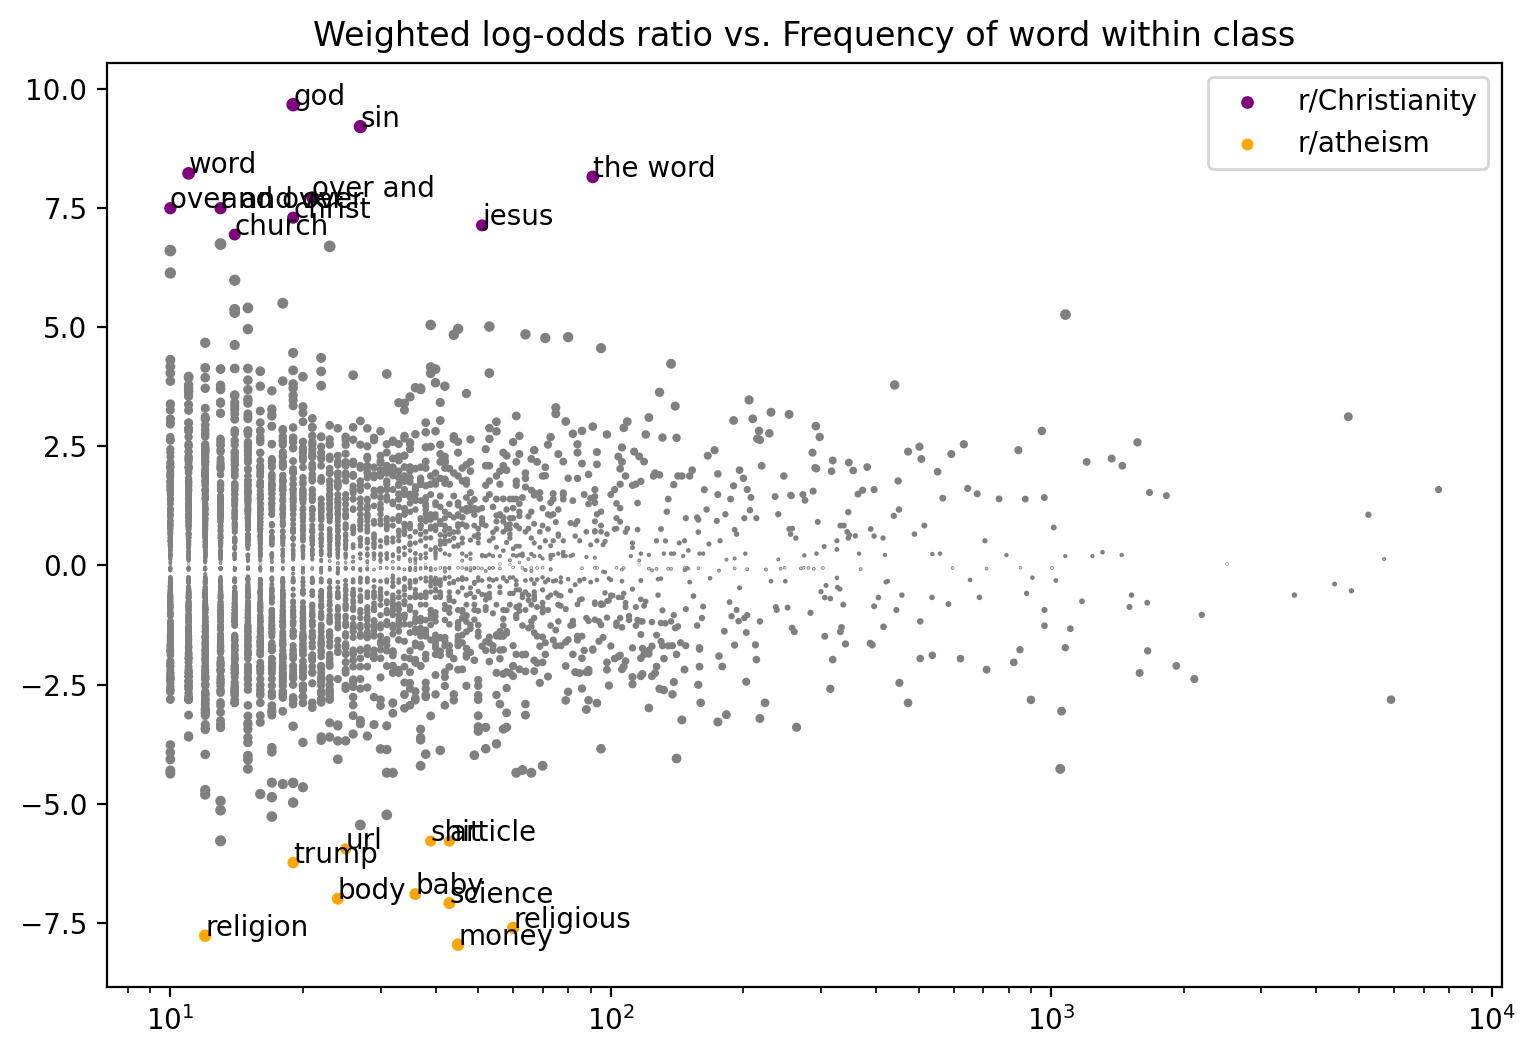

,z-score,class
ngram,,
money,-7.957425,r/atheism
religion,-7.769434,r/atheism
religious,-7.605858,r/atheism
science,-7.084885,r/atheism
body,-6.993762,r/atheism
...,...,...
over and,7.718249,r/Christianity
the word,8.149449,r/Christianity
word,8.223430,r/Christianity


In [46]:
fw.summarize(corpus, plot=True, class1_name='r/Christianity', class2_name='r/atheism')

Not only do we get a visual plot summarizing the differences, we get a DataFrame mapping an n-gram to its z-score (a measure of how salient the n-gram is) and the class it belongs to.

As we can see, r/Christianity is comparatively more likely to use terms like 'god', 'sin', and 'christ', while r/atheism uses terms 'money', 'religion', and 'science'.

We have gone through the application of the Fighting Words to a corpus. Other Transformers follow a similar pattern. To reiterate:

- They are initialized with several configurable parameters.
- They may be ``fit()`` on the Corpus if the Transformer needs to learn something from the Corpus.
- They can ``transform()`` the corpus to annotate its components with the output of the Transformer.
- They can ``summarize()`` their results in a more visual and easily interpreted format -- though in most cases (but not this one), this requires that the Corpus be transformed first.
- These ``fit()``, ``transform()``, ``summarize()`` functions have ``selector`` as an argument so you can further specify subsets of the Corpus to analyze.

Other transformers can be applied in the same way, and even chained in sequence.

This concludes our introductory tutorial to ConvoKit. Read our [documentation](https://convokit.cornell.edu/documentation/) for an exhaustive coverage of ConvoKit's classes and functions, and get in touch with us at our [GitHub repo](https://github.com/CornellNLP/ConvoKit) if you would like to add your conversational datasets & methods to ConvoKit or make any feature requests!